In [1]:
# important libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# to display stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [ ]:
# to check the number of categories in species
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Preprocessing the dataset


In [28]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

so no null values are present in the data.


## Exploratory Data 

### 1. Histogram

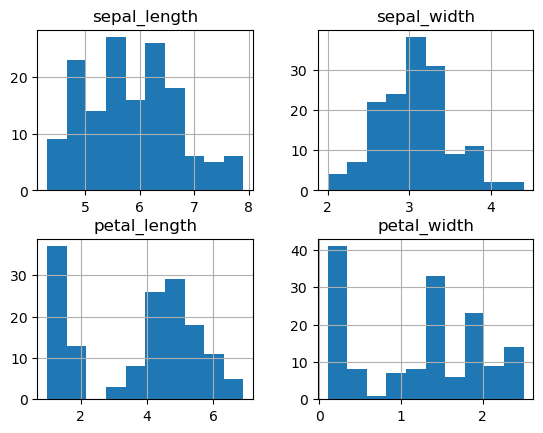

In [15]:
df.hist()
plt.show()

Looking at the above histogram we can see that sepal_length and sepal_width are noramally distributed and petal_length and petal_length and petal_width show two class.

### 2. Scatterplot

Text(0.5, 1.0, 'Sepal Length vs Width by Species')

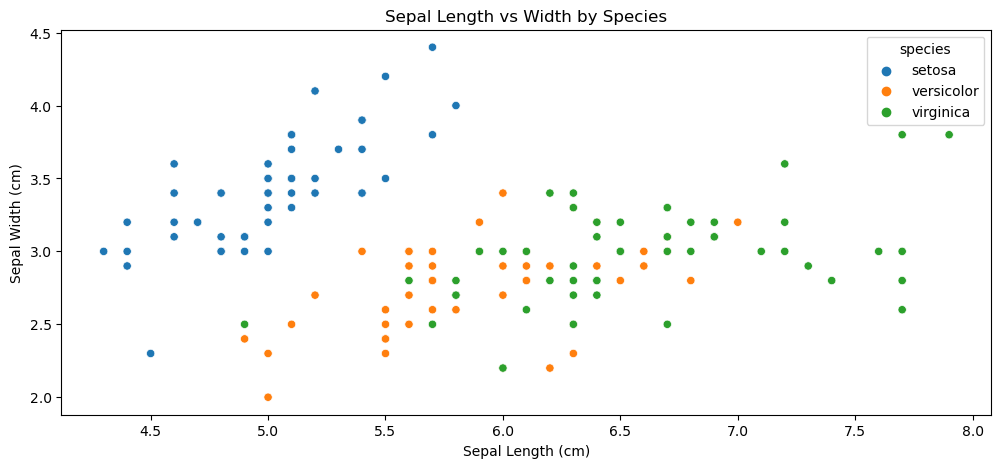

In [16]:
# Create a scatterplot with hue to separate species
plt.figure(figsize=(12, 5)) 

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')



# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width by Species')

Text(0.5, 1.0, 'Petal Length vs Width by Species')

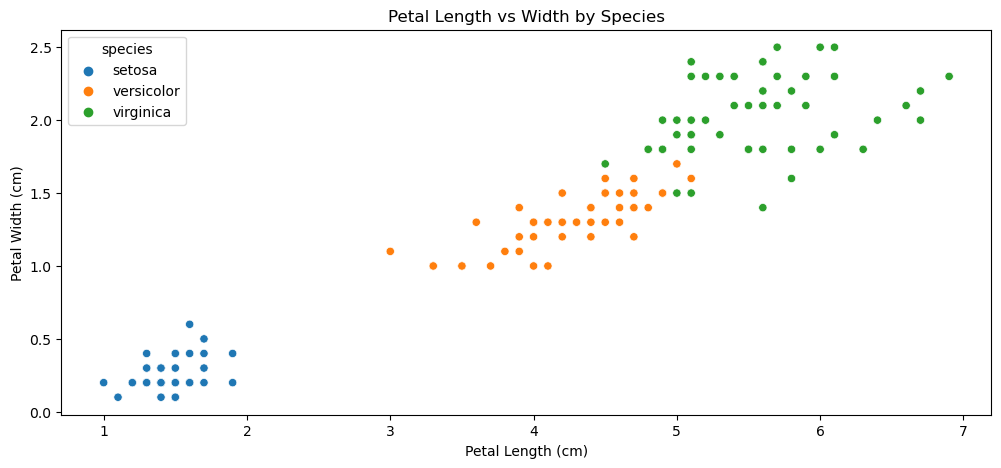

In [17]:
# Create a scatterplot with hue to separate species
plt.figure(figsize=(12, 5)) 

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')



# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Width by Species')

Text(0.5, 1.0, 'Petal Length vs Width by Species')

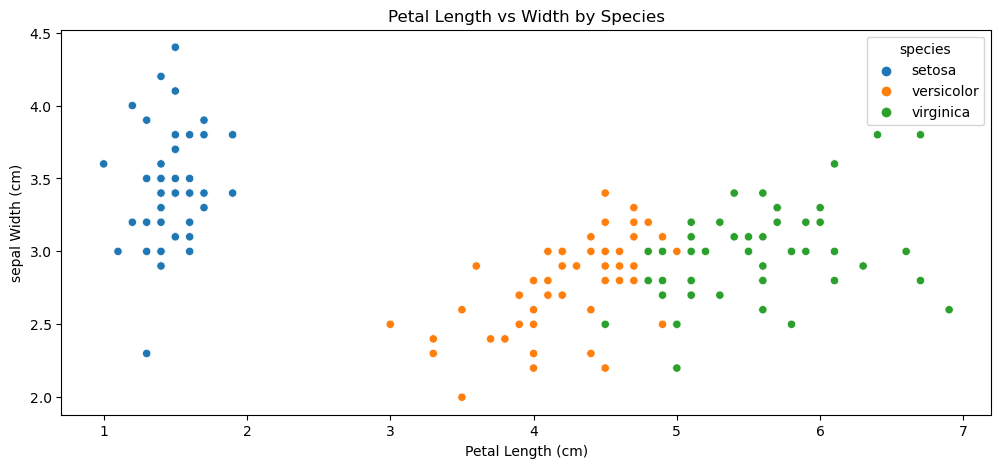

In [29]:
# Create a scatterplot with hue to separate species
plt.figure(figsize=(12, 5)) 

sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='species')



# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('sepal Width (cm)')
plt.title('Petal Length vs Width by Species')

Text(0.5, 1.0, 'Petal Length vs Width by Species')

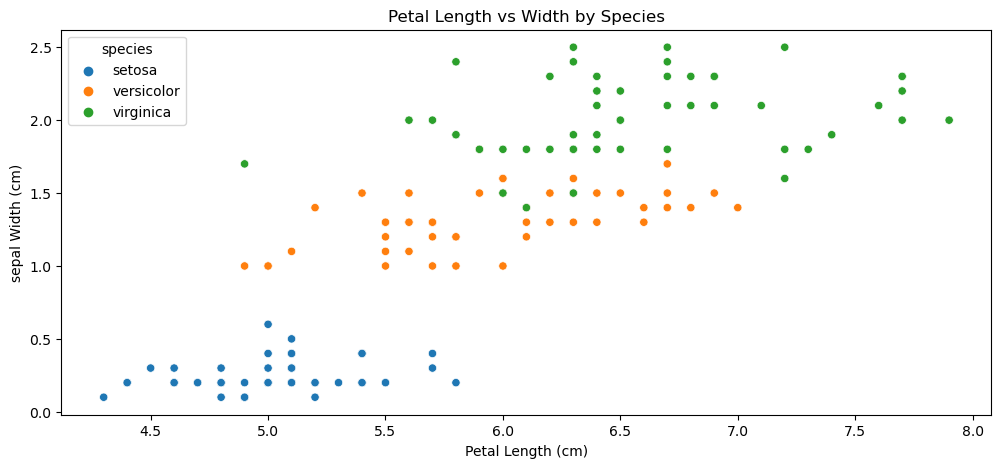

In [30]:
# Create a scatterplot with hue to separate species
plt.figure(figsize=(12, 5)) 

sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue='species')



# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('sepal Width (cm)')
plt.title('Petal Length vs Width by Species')

<Axes: xlabel='species', ylabel='sepal_width'>

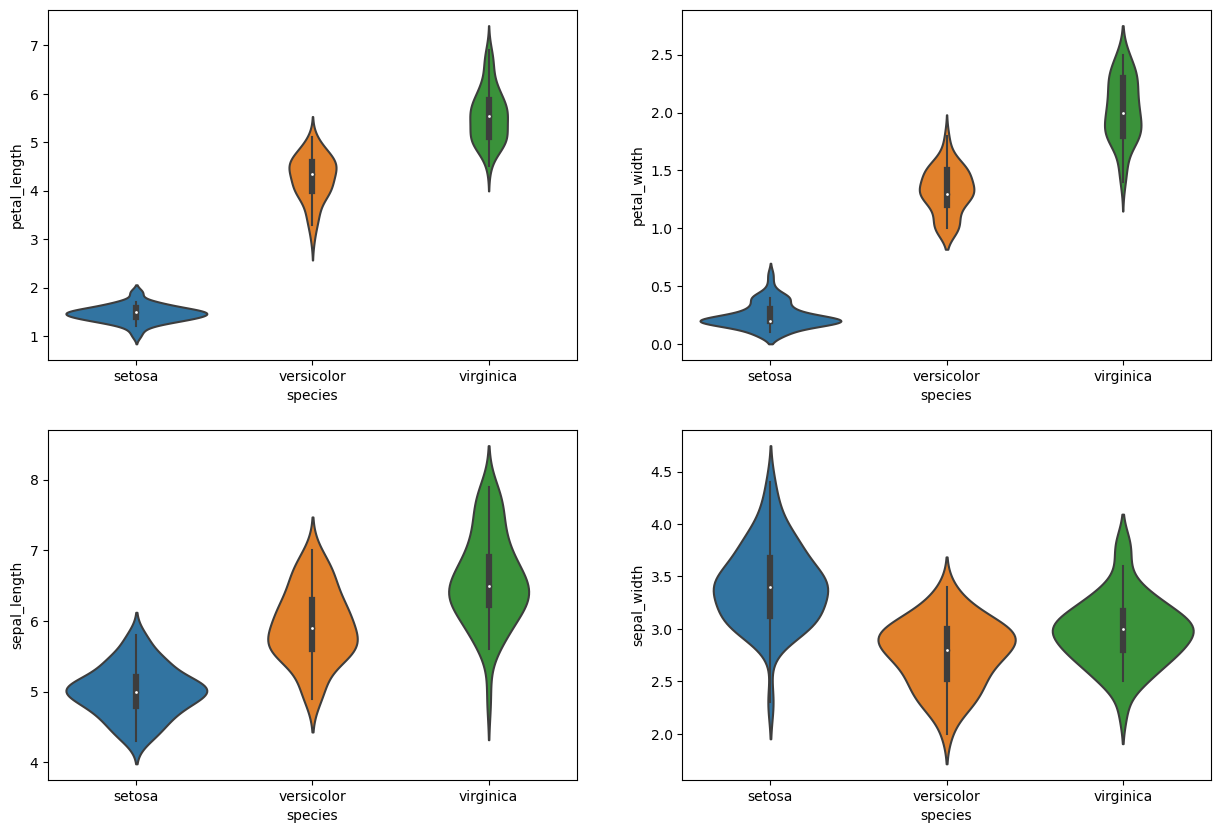

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

## Correlation matrix

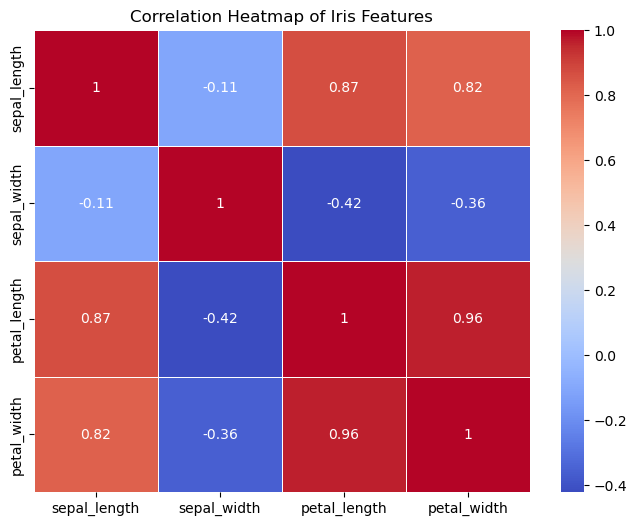

In [31]:
corr = df.drop('species', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

In [32]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='sepal_length',
    y='petal_length',
    z='petal_width',
    color='species',
    title='3D Scatter Plot of Iris Dataset',
    width=1000,  # make it wide
    height=600, # make it tall
)

fig.update_traces(marker=dict(size=6))  # adjust marker size
fig.show()



### splitting and labelencoding

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split first
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

# Apply LabelEncoder **only on y_train**
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Transform y_test using the same encoder
y_test_encoded = le.transform(y_test)

### Model Training

Using all the features 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test_encoded, y_pred),
        'Precision': precision_score(y_test_encoded, y_pred, average='macro'),
        'Recall': recall_score(y_test_encoded, y_pred, average='macro'),
        'F1-Score': f1_score(y_test_encoded, y_pred, average='macro')
    })

results_df = pd.DataFrame(results)
print(results_df)




                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.983333   0.979167  0.982456  0.980238
1            KNN (k=3)  0.983333   0.979167  0.982456  0.980238
2        Random Forest  0.950000   0.944444  0.947368  0.941126


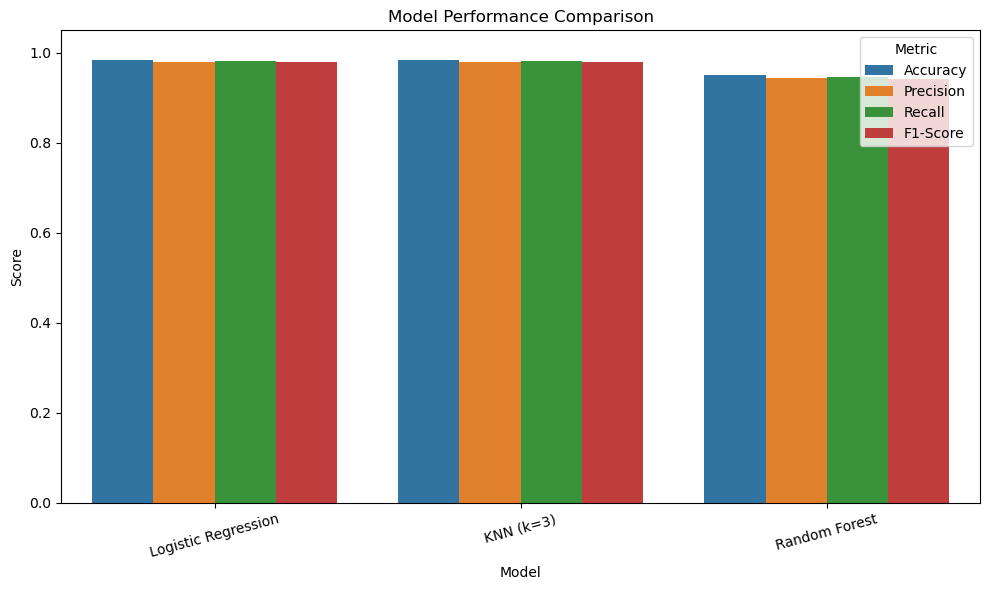

In [58]:
# Set figure size
plt.figure(figsize=(10, 6))

# Melt the DataFrame for easier plotting
plot_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create bar plot
import seaborn as sns
sns.barplot(data=plot_df, x='Model', y='Score', hue='Metric')

# Title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


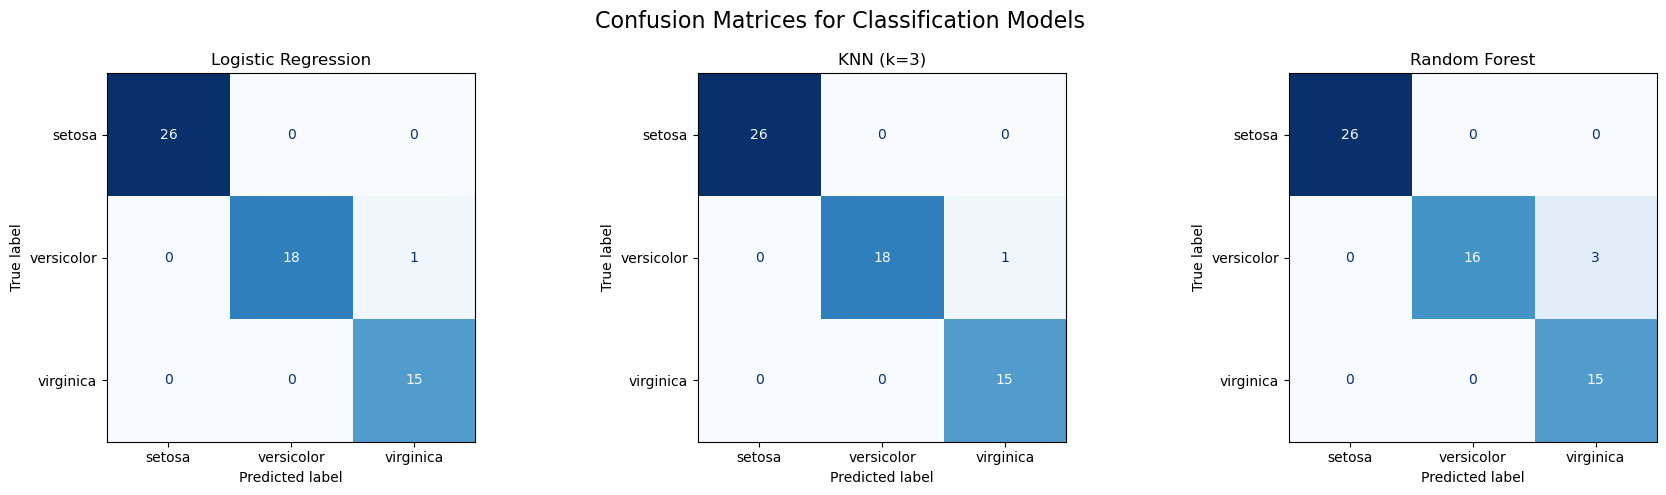

In [59]:
# Define figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # One subplot for each model

# List of model names (matching order in training loop)
model_names = ['Logistic Regression', 'KNN (k=3)', 'Random Forest']

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test_encoded, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)

plt.suptitle('Confusion Matrices for Classification Models', fontsize=16)
plt.tight_layout()
plt.show()


## Model trainig 
### using only patel_length and patel_width


In [62]:
petal = df[["petal_length",	"petal_width","species"]]
petal.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [65]:


# Split first
X1 = petal.drop('species', axis=1)
y1 = petal['species']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=12)

# Apply LabelEncoder **only on y_train**
le = LabelEncoder()
y_train_encoded1 = le.fit_transform(y_train1)

# Transform y_test using the same encoder
y_test_encoded1 = le.transform(y_test1)

In [66]:
models1 = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

results1 = []

for name1, model1 in models1.items():
    model1.fit(X_train1, y_train_encoded1)
    y_pred1 = model.predict(X_test1)

    results1.append({
        'Model': name1,
        'Accuracy': accuracy_score(y_test_encoded1, y_pred1),
        'Precision': precision_score(y_test_encoded1, y_pred1, average='macro'),
        'Recall': recall_score(y_test_encoded1, y_pred1, average='macro'),
        'F1-Score': f1_score(y_test_encoded1, y_pred1, average='macro')
    })

results_df1 = pd.DataFrame(results1)
print(results_df1)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression      0.95   0.944444  0.947368  0.941126
1            KNN (k=3)      0.95   0.944444  0.947368  0.941126
2        Random Forest      0.95   0.944444  0.947368  0.941126
